<a href="https://colab.research.google.com/github/cermegno/my-computer-vision/blob/main/classification/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification Example
Notebook to detect arm poses to provide control commands to a drone

###Install Yolo
Start by installing the Python library Ultralytics. Its dependencies are also pulling other libraries we need,ex: OpenCV and MatPlotLib

In [78]:
%pip install ultralytics

Import it

In [79]:
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt

### Grab YOLO classification model
Grab it and show the details of the model

In [83]:
model = YOLO("yolo11l-cls.pt")
model.info()

YOLO11l-cls summary: 176 layers, 14,115,624 parameters, 0 gradients, 50.8 GFLOPs


(176, 14115624, 0, 50.7953152)

###Get the image and run predication

In [105]:
source = 'warehouse.png'
results = model(source)



image 1/1 /content/soccer.png: 224x224 soccer_ball 0.97, rugby_ball 0.02, volleyball 0.00, football_helmet 0.00, baseball 0.00, 360.1ms
Speed: 23.0ms preprocess, 360.1ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)


###Process the image

In [106]:
# Process the first item in the list. It is list to allow for batch processing
res = results[0]
res_plotted = res.plot()  # This returns a BGR numpy array

# Convert BGR (OpenCV) to RGB for Matplotlib
res_rgb = cv2.cvtColor(res_plotted, cv2.COLOR_BGR2RGB)

# Get the top prediction for the title
top_class_name = res.names[res.probs.top1]
confidence = res.probs.top1conf.item()


###Show image with predictions

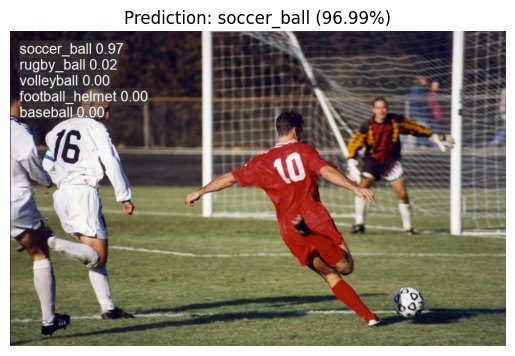

In [107]:
plt.imshow(res_rgb)
plt.title(f"Prediction: {top_class_name} ({confidence:.2%})")
plt.axis('off')
plt.show()
